            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


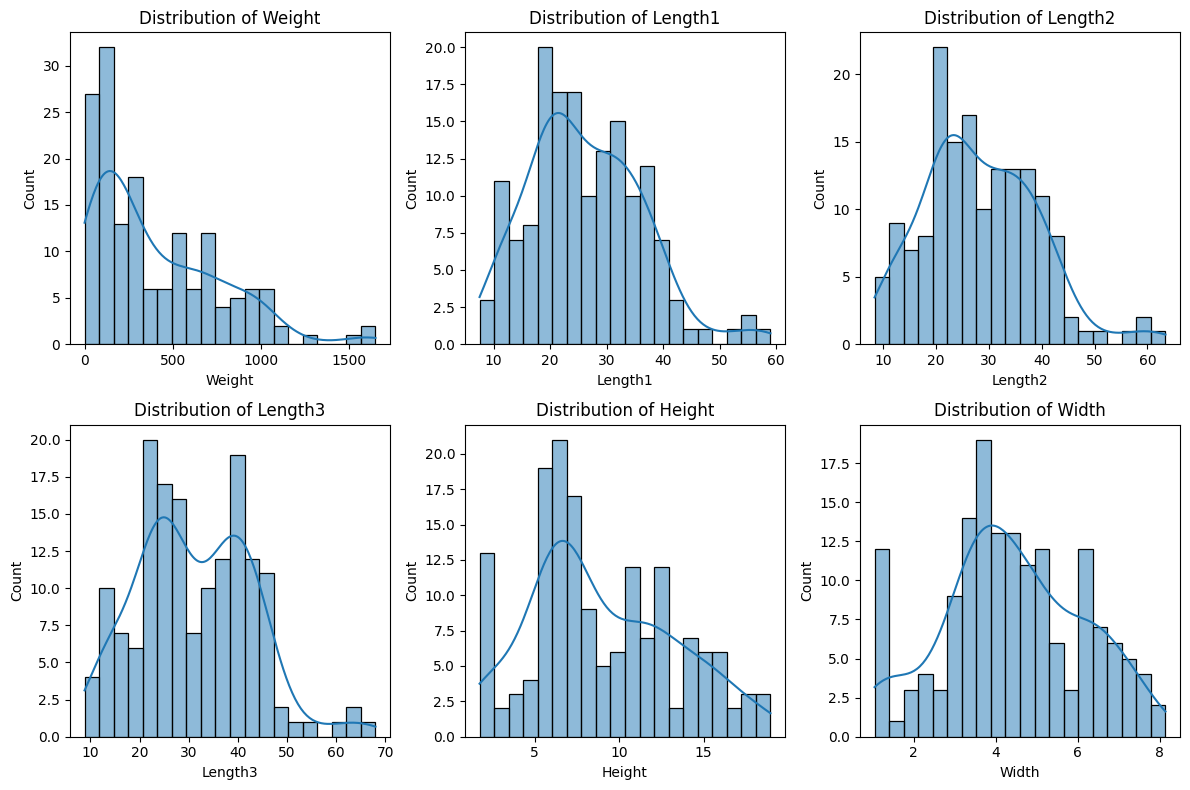

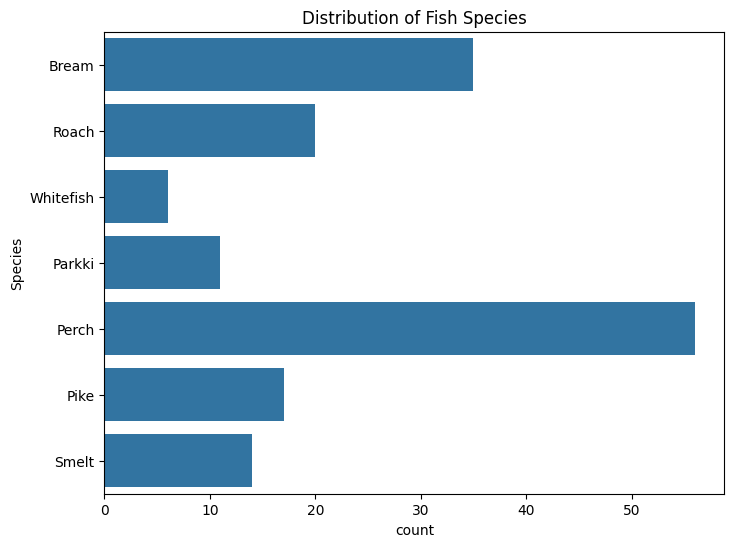

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
fish_data = pd.read_csv('Fish.csv')

# Displaying summary statistics
print(fish_data.describe())

# Checking for missing values
print(fish_data.isnull().sum())

# Visualizing distributions of numerical features
plt.figure(figsize=(12, 8))
for i, column in enumerate(fish_data.columns[1:], 1):  # Skipping 'Species' for numerical data
    plt.subplot(2, 3, i)
    sns.histplot(fish_data[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Visualizing the balance of fish species
plt.figure(figsize=(8, 6))
sns.countplot(data=fish_data, y='Species')
plt.title('Distribution of Fish Species')
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Loading the dataset
fish_data = pd.read_csv('Fish.csv')

# Preprocessing
# One-hot encode the 'Species' column as it is categorical
categorical_features = ['Species']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                  remainder="passthrough")

# Defining features and target variable
X = fish_data.drop('Weight', axis=1)
y = fish_data['Weight']

# Spliting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection
# Creating a pipeline that first transforms the data and then fits a model
model = Pipeline(steps=[('transformer', transformer),
                        ('model', LinearRegression())])

# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 7007.3831898540975
R^2 Score: 0.9507352480054502


In [3]:
from joblib import dump

# Assuming 'model' is your trained model
dump(model, 'model1.joblib')


NameError: name 'model' is not defined

In [2]:
!pip install joblib


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump

# Loading the dataset
fish_data = pd.read_csv('Fish.csv')

# Preprocessing
# One-hot encode the 'Species' column as it is categorical
categorical_features = ['Species']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                  remainder="passthrough")

# Defining features and target variable
X = fish_data.drop('Weight', axis=1)
y = fish_data['Weight']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection
# Creating a pipeline that first transforms the data and then fits a model
model = Pipeline(steps=[('transformer', transformer),
                        ('model', LinearRegression())])

# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Save the model to a file
dump(model, 'fish_weight_model.joblib')


Mean Squared Error: 7007.3831898540975
R^2 Score: 0.9507352480054502


['fish_weight_model.joblib']

In [5]:
from flask import Flask, request, render_template
from joblib import load
import numpy as np

app = Flask(__name__)

# Load the model
model = load('fish_weight_model.joblib')

@app.route('/', methods=['GET', 'POST'])
def home():
    prediction = None
    if request.method == 'POST':
        # Extract features from the form
        # Replace these with actual form field names and processing logic
        # Assuming the form provides all the necessary features except 'Weight'
        try:
            features = [request.form['feature1'], request.form['feature2'], request.form['feature3'], request.form['feature4'], request.form['feature5'], request.form['feature6']]
            features = [float(i) for i in features]  # Convert all inputs to float
            features = np.array(features).reshape(1, -1)  # Reshape for a single sample

            # Make a prediction
            prediction = model.predict(features)[0]
        except Exception as e:
            prediction = f"Error: {str(e)}"

    return render_template('index.html', prediction=prediction)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

c:\Users\AliIst\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
